<a href="https://colab.research.google.com/github/Greg-Vincent0711/Learning-Pytorch/blob/main/01_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# example pytorch end to end workflow

import torch
# nn contains all pytorch building blocks for neural nets
from torch import nn
# for visualizations
import matplotlib.pyplot as plt
import numpy as np
torch.__version__


'2.1.0+cu121'

In [5]:
# 1. preparing and loading data as tensors

# using linear regression with a known dataset/representation

# creating the known parameters/dataset
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
# X is capital since it's typically a matrix/tensor
# unsqueeze ADDS another dimension to the data - square brackets
X = torch.arange(start, end, step).unsqueeze(dim=1)
# where linear regression - y = mx + b = ax + b, etc
y = weight * X + bias

X[:10], y[:10]





(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
# splitting data into training and tests sets - very important
# testing/training is usually an 80% 20% split
train_split = int(0.8 * len(X))
# 40 samples
X_train, y_train = X[:train_split], y[:train_split]
# remaining 10
X_test, y_test = X[train_split:], y[train_split:]



In [7]:

"""
  plots training data, test data, compares predictions
"""
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_lables=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_lables, c="g", s=4, label="Test data")

    if predictions is not None:
      # if perfect, prediction should be on top
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop = {"size": 1})




In [8]:
# Building a pytorch linear regression model...y = weight * X + bias
from torch import nn

# inherits from neural network module. most inherit from that
class LinearRegModel(nn.Module):
  def __init__(self):
    # calls initialize method on parent class
    super().__init__()
    """
    nn.Parameter - explicitly a parameter of the model
    torch.randn(1,) tensor with random values from a std.dev
    requires_grad - tracked for differentation, used for
    gradient descent/backprop
    torch.float = torch.float32 = default torch datatype
    """
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # defining forward fn . x represents input layer data
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias






In [9]:
# pytorch model building essentials
"""
torch.nn - contains all building blocks for computational graphs
torch.nn.Parameter - what parameters should our model try and learn
torch.nn.Module - base class for all neural networks
if it's subclassed, overwrite forward(), this is required
torch.optim - optimizers that help with gradient descent
"""


"\ntorch.nn - contains all building blocks for computational graphs\ntorch.nn.Parameter - what parameters should our model try and learn\ntorch.nn.Module - base class for all neural networks\nif it's subclassed, overwrite forward(), this is required\ntorch.optim - optimizers that help with gradient descent\n"

In [10]:
# Creating a subclass and messing around with the LinearReg model

# set a random seed
torch.manual_seed(42)

# create an instance of the model

model_0 = LinearRegModel()

# look at the parameters
list(model_0.parameters())

# lists the parameters in a more proper way
model_0.state_dict()



OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
# making predictions with torch.inference_mode()
# inference_mode makes it
with torch.inference_mode():
  # if model is perfect, the y_preds list should equal y_test
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

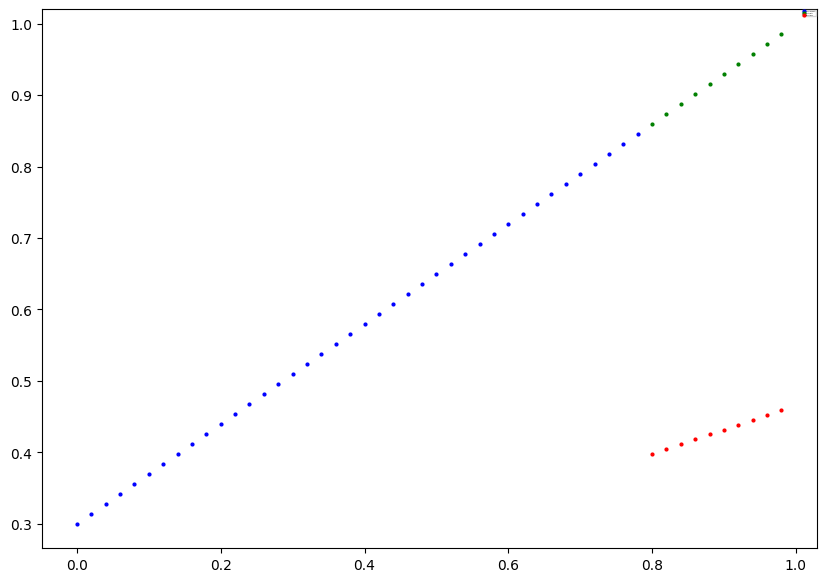

In [13]:
# as of right now, the model isn't too accurate
plot_predictions(predictions=y_preds)

In [14]:
# actually training the model - setting up a loss fn and optimizer

torch.manual_seed(42)
 # L1 Loss fn
loss_fn = nn.L1Loss()

"""
optimizer using stochastic gradient descent
learning rate is like a measure of precision for
how much w and b are updated
"""
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# building a training and testing loop
# loop through the data
# forward pass the data
# calculate loss - compare foward pass predictions to labels
# optimizer zero grad
# Loss backward - move backwards/backprop to calc gradient of each param
# with respect to loss
# Optimizer step - use optimizer to adjust model's parameters(gradient descent)

# an epoch is one loop through the data
# this is a hyperparameter since it's user set
epochs = 200
epoch_count = []
loss_values = []
test_loss_vals = []


# loop through the data
for epoch in range(epochs):
  # set the model to training mode.
  # any params that need gradients are set to require_gradient=true
  model_0.train()

  # forward pass
  y_pred = model_0(X_train)

  # calculate the loss between model predictions and ideal training values
  loss = loss_fn(y_pred, y_train)


  # initialize gradients to zero for each epoch
  optimizer.zero_grad()

  # perform backpropagation w/ respect to parameters
  loss.backward()

  # step the optimizer, always after backprop
  # how the optimizer changes will accumulate through the loop
  optimizer.step()

  # writing a testing loop

  # turns of model settings not needed for testing
  model_0.eval()

  with torch.inference_mode():
    # still do forward pass
    test_pred = model_0(X_test)
    # calculate the loss, different parameters this time
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_vals.append(test_loss)
      print(f"Epoch : {epoch} | Loss: {loss} | Test loss: {test_loss}")






Epoch : 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch : 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch : 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch : 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch : 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch : 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch : 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch : 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch : 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch : 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch : 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch : 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch : 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch : 130 | Loss: 0.014155393466353416 | Test loss: 0.032332

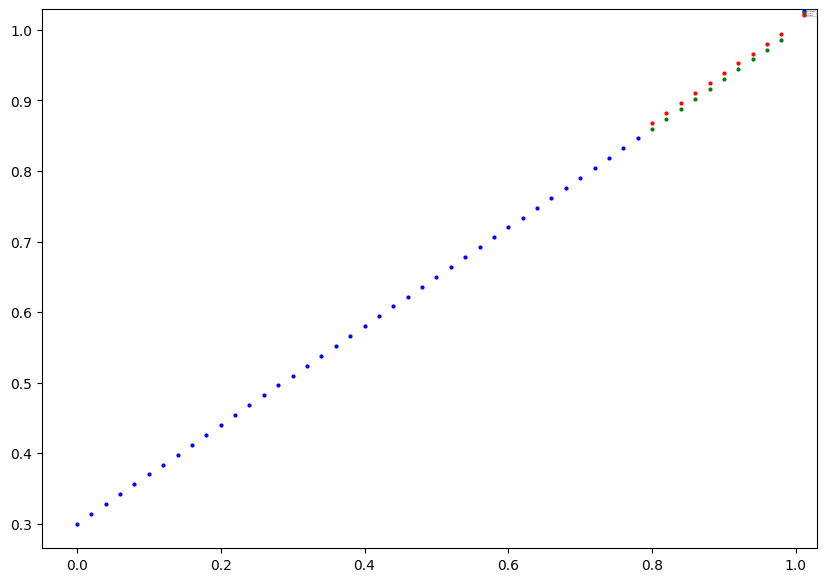

In [15]:
# after training the model multiple times
# and updating weights and biases
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)


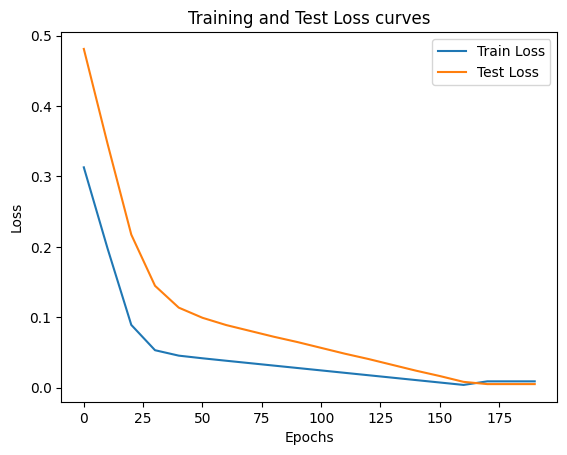

In [16]:
# training and loss curves over time, model is getting more accurate over epochs
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_vals).numpy()), label="Test Loss")
plt.title("Training and Test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [17]:
# saving a model

from pathlib import Path

# create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path, has to be saved with .pt or .pth
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [23]:
# loading a model
loaded_model_0 = LinearRegModel()

# loading the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()



OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
# compare loaded_model_preds to model_0 preds

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)


loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])